In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from dask.distributed import Client, progress

client = Client()
# client = Client('127.0.0.1:8786')
client

Client Scheduler: tcp://127.0.0.1:56171 Dashboard: http://127.0.0.1:56172/status,Cluster Workers: 8 Cores: 8 Memory: 17.18 GB


In [3]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [4]:
%%time
X, y = dask_ml.datasets.make_blobs(n_samples=10000000, chunks=1000000, random_state=0, centers=3)
X = X.persist()
X

CPU times: user 3.33 s, sys: 613 ms, total: 3.94 s
Wall time: 3.61 s


In [5]:
%%time
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

CPU times: user 2.32 s, sys: 1.93 s, total: 4.25 s
Wall time: 11.4 s


CPU times: user 297 ms, sys: 112 ms, total: 409 ms
Wall time: 1.52 s


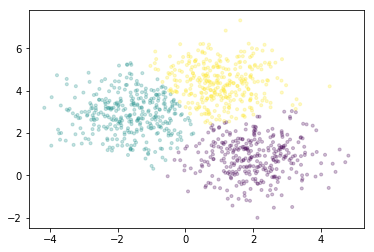

In [6]:
%%time
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);